## Loading the Dataset

In [1]:
from data import STEAD
stead = STEAD('/home/srivastava-shared/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


## Getting Data and Labels in the format for CREIME

In [2]:
X, y = stead.get_creime_rt_data(stead.trace_list()[-20:])

 80%|████████  | 16/20 [00:00<00:00, 28.38it/s]

In [3]:
X

[array([[ -4.6691837,   8.1942625,  -3.4905932],
        [ -8.825242 ,   3.316561 ,  -2.6261344],
        [ -5.0431643,   4.2095633,  -2.7576644],
        ...,
        [  4.137321 ,   9.139245 ,  -6.771683 ],
        [ -1.0408942,  16.24446  , -15.898888 ],
        [-10.2339525,   4.932671 ,  -5.100409 ]], dtype=float32),
 array([[ 32.384384  ,  14.683218  ,  -6.9577217 ],
        [ -4.6431026 , -12.711743  ,   4.774316  ],
        [ 20.61114   , -21.363838  ,   2.685027  ],
        ...,
        [-13.658288  ,   0.83383495,  18.149914  ],
        [  2.283843  ,  14.037079  ,  19.649233  ],
        [  6.540404  , -25.269064  ,   1.5755206 ]], dtype=float32),
 array([[ -5.656401  ,   0.8387044 ,  17.084286  ],
        [ 13.030329  , -13.104409  ,  31.997667  ],
        [ -9.498771  , -11.276993  ,  -9.740155  ],
        ...,
        [ -6.13372   ,  -6.640191  ,   8.058543  ],
        [  7.2052073 ,  -2.2243316 ,  -0.984556  ],
        [ -0.29667428,  22.106665  ,  -2.7046964 ]], dtype=fl

In [4]:
y.shape

(20, 6000)

In [5]:
from visualizations import plot_creime_rt_data

100%|██████████| 20/20 [00:00<00:00, 21.77it/s]


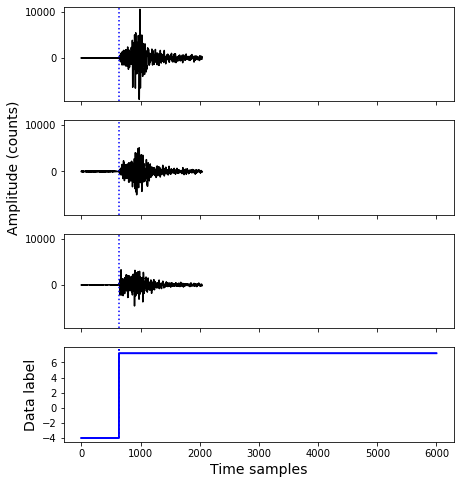

In [6]:
plot_creime_rt_data(X[6], y[6])

## Loading CREIME_RT

In [7]:
from models import CREIME_RT
creime_rt = CREIME_RT()
print(creime_rt)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6000, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 6000, 64)     1600        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 6000, 64)     384000      ['conv1d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 6000, 64)     0           ['p_re_lu[0][0]']                
                                                                                              

In [8]:
y_pred, predictions = creime_rt.predict(X)

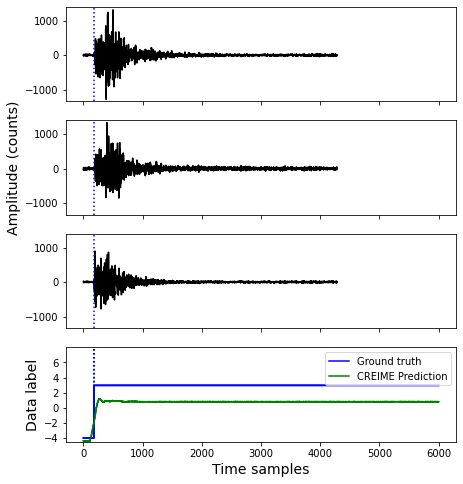

In [9]:
plot_creime_rt_data(X[3], y[3], y_pred[3])

In [10]:
predictions

[(1, 0.7948961),
 (1, 0.9236595),
 (1, 0.6686684),
 (1, 0.800128),
 (1, 0.7074902),
 (1, 1.2207837),
 (1, 1.7688872),
 (1, 0.67135894),
 (1, 0.87974405),
 (1, 0.82520425),
 (1, 1.5154514),
 (1, 2.150598),
 (1, 0.73329115),
 (1, 0.8647438),
 (1, 0.54612666),
 (1, 0.6089603),
 (1, 1.0944905),
 (1, 1.8891462),
 (1, 0.78746545),
 (1, 1.3533819)]

Alternatively

In [12]:
model = creime_rt.get_model()